<a href="https://colab.research.google.com/github/ARNAVKS/Cat-vs-Dog/blob/main/Cat_vs_Dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d karakaggle/kaggle-cat-vs-dog-dataset

kaggle-cat-vs-dog-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
from zipfile import ZipFile
dataset = '/content/kaggle-cat-vs-dog-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('Extracted')

Extracted


In [5]:
import os

Importing all the cat image file names in cat_files

In [6]:
cat_files = os.listdir('/content/kagglecatsanddogs_3367a/PetImages/Cat')

In [7]:
len(cat_files)

12491

Deleting the non-image file in cat_files

In [8]:
cat=[]
for i in cat_files:
  if i!='Thumbs.db':
    cat.append(i)

In [9]:
len(cat)

12490

In [10]:
cat=cat[:1200]

In [11]:
len(cat)

1200

Importing all the dog image files names in dog_files

In [12]:
dog_files = os.listdir('/content/kagglecatsanddogs_3367a/PetImages/Dog')

In [13]:
len(dog_files)

12470

Deleting the non-image file in dog_files

In [14]:
dog=[]
for i in dog_files:
  if i!='Thumbs.db':
    dog.append(i)

In [15]:
len(dog)

12469

In [16]:
dog=dog[:1200]

Making the label for cat and dog

In [17]:
cat_label = [0]*1200
dog_label = [1]*1200

Merging both the labeling in label

In [18]:
label = cat_label+dog_label

In [19]:
from PIL import Image

Importing all the image array in the data

In [20]:
data = []

cat_path = '/content/kagglecatsanddogs_3367a/PetImages/Cat/'

for img_path in cat:
  image = Image.open(cat_path+img_path)
  image = image.resize((256,256))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

dog_path = '/content/kagglecatsanddogs_3367a/PetImages/Dog/'

for img_path in dog:
  image = Image.open(dog_path+img_path)
  image = image.resize((256,256))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

In [21]:
from google.colab.patches import cv2_imshow

In [22]:
len(data)

2400

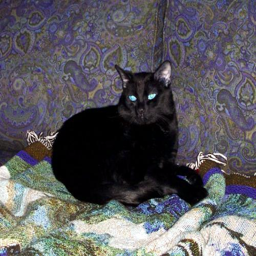

In [23]:
cv2_imshow(data[1])

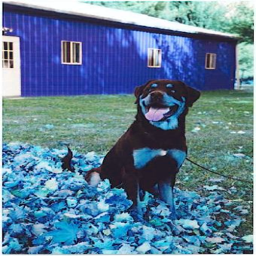

In [24]:
cv2_imshow(data[1590])

In [25]:
X = np.array(data)
y = np.array(label)

In [26]:
X.shape

(2400, 256, 256, 3)

In [27]:
y.shape

(2400,)

Doing train test split

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 2)

In [30]:
print(X_train.shape, X_test.shape)

(1800, 256, 256, 3) (600, 256, 256, 3)


Slicing the data into smaller data as RAM keep crashing with more data

In [31]:
X_train_=X_train[:6000]
y_train_=y_train[:6000]
X_test_=X_test[:1000]
y_test_=y_test[:1000]

In [32]:
print(X_train_.shape, X_test_.shape)

(1800, 256, 256, 3) (600, 256, 256, 3)


In [33]:
X_train[0]

array([[[28, 29, 23],
        [27, 28, 22],
        [26, 27, 21],
        ...,
        [13, 13, 13],
        [ 9,  9,  9],
        [ 9,  9,  9]],

       [[28, 29, 23],
        [27, 28, 22],
        [26, 27, 21],
        ...,
        [13, 13, 13],
        [10, 10, 10],
        [10, 10, 10]],

       [[28, 29, 23],
        [27, 28, 22],
        [26, 27, 21],
        ...,
        [13, 13, 13],
        [11, 11, 11],
        [11, 11, 11]],

       ...,

       [[55, 56, 48],
        [55, 57, 48],
        [56, 57, 47],
        ...,
        [97, 73, 45],
        [97, 73, 45],
        [96, 72, 44]],

       [[55, 56, 48],
        [54, 56, 47],
        [54, 56, 46],
        ...,
        [97, 73, 45],
        [96, 72, 44],
        [95, 71, 43]],

       [[55, 56, 48],
        [54, 55, 47],
        [53, 55, 45],
        ...,
        [95, 71, 43],
        [94, 70, 44],
        [93, 69, 42]]], dtype=uint8)

Scaling the images by dividing with 255

In [34]:
X_train_scaled, X_test_scaled = X_train/255, X_test/255

In [35]:
X_train_scaled[0]

array([[[0.10980392, 0.11372549, 0.09019608],
        [0.10588235, 0.10980392, 0.08627451],
        [0.10196078, 0.10588235, 0.08235294],
        ...,
        [0.05098039, 0.05098039, 0.05098039],
        [0.03529412, 0.03529412, 0.03529412],
        [0.03529412, 0.03529412, 0.03529412]],

       [[0.10980392, 0.11372549, 0.09019608],
        [0.10588235, 0.10980392, 0.08627451],
        [0.10196078, 0.10588235, 0.08235294],
        ...,
        [0.05098039, 0.05098039, 0.05098039],
        [0.03921569, 0.03921569, 0.03921569],
        [0.03921569, 0.03921569, 0.03921569]],

       [[0.10980392, 0.11372549, 0.09019608],
        [0.10588235, 0.10980392, 0.08627451],
        [0.10196078, 0.10588235, 0.08235294],
        ...,
        [0.05098039, 0.05098039, 0.05098039],
        [0.04313725, 0.04313725, 0.04313725],
        [0.04313725, 0.04313725, 0.04313725]],

       ...,

       [[0.21568627, 0.21960784, 0.18823529],
        [0.21568627, 0.22352941, 0.18823529],
        [0.21960784, 0

In [36]:
from tensorflow.keras import layers, models

Making a CNN model

In [37]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256,256,3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2),strides=2,padding='valid'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2),strides=2,padding='valid'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2),strides=2,padding='valid'))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2),strides=2,padding='valid'))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

Fitting the data in the model with epochs = 30

In [39]:
model.fit(X_train_scaled, y_train, epochs=30, validation_data=(X_test_scaled, y_test))

Epoch 1/30
57/57 [==============================] - 23s 145ms/step - loss: 1.4050 - accuracy: 0.5572 - val_loss: 0.9116 - val_accuracy: 0.4917
Epoch 2/30
57/57 [==============================] - 5s 95ms/step - loss: 0.8657 - accuracy: 0.5794 - val_loss: 0.7662 - val_accuracy: 0.4883
Epoch 3/30
57/57 [==============================] - 5s 94ms/step - loss: 0.7754 - accuracy: 0.6017 - val_loss: 1.4377 - val_accuracy: 0.4933
Epoch 4/30
57/57 [==============================] - 5s 91ms/step - loss: 0.6977 - accuracy: 0.6528 - val_loss: 0.8507 - val_accuracy: 0.5233
Epoch 5/30
57/57 [==============================] - 5s 94ms/step - loss: 0.5986 - accuracy: 0.6939 - val_loss: 0.8983 - val_accuracy: 0.5050
Epoch 6/30
57/57 [==============================] - 5s 93ms/step - loss: 0.5574 - accuracy: 0.7222 - val_loss: 0.8437 - val_accuracy: 0.5300
Epoch 7/30
57/57 [==============================] - 5s 94ms/step - loss: 0.4859 - accuracy: 0.7756 - val_loss: 0.6622 - val_accuracy: 0.6400
Epoch 8/30


Exporting the model using pickle

In [48]:
import pickle
pickle.dump(model,open('dog_cat.pkl','wb'))

In [41]:
import cv2
from google.colab.patches import cv2_imshow

Testing the model with random images

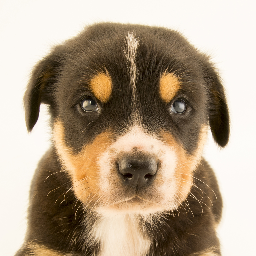

1/1 [==============================] - 0s 29ms/step
[[0.97094035]]
Dog


In [43]:
img_path = 'domestic-dog_thumb_square.jpg'
img = cv2.imread(img_path)
img = cv2.resize(img, (256,256))
cv2_imshow(img)
img = img/255
img = np.reshape(img,[1,256,256,3])
pred = model.predict(img)
print(pred)
if pred[0]>0.5:
  print('Dog')
else:
  print('Cat')

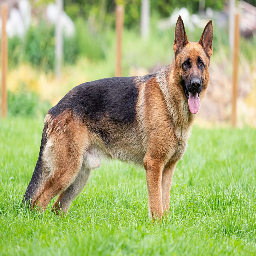

1/1 [==============================] - 0s 39ms/step
[[0.99999964]]
Dog


In [44]:
img_path = 'German-Shepherd-dog-Alsatian.jpg'
img = cv2.imread(img_path)
img = cv2.resize(img, (256,256))
cv2_imshow(img)
img = img/255
img = np.reshape(img,[1,256,256,3])
pred = model.predict(img)
print(pred)
if pred[0]>0.5:
  print('Dog')
else:
  print('Cat')

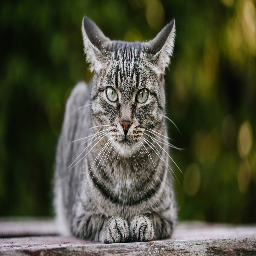

1/1 [==============================] - 0s 31ms/step
[[0.00021496]]
Cat


In [45]:
img_path = 'cat.jpg'
img = cv2.imread(img_path)
img = cv2.resize(img,(256,256))
cv2_imshow(img)
img = img/255
img = np.reshape(img,[1,256,256,3])
pred = model.predict(img)
print(pred)
if pred[0]>0.5:
  print('Dog')
else:
  print('Cat')

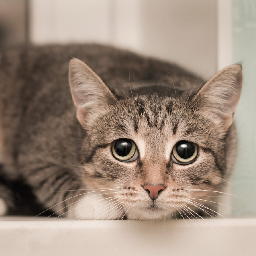

1/1 [==============================] - 0s 39ms/step
[[0.00025505]]
Cat


In [46]:
img_path = 'Cat_s_Mind.jpg'
img = cv2.imread(img_path)
img = cv2.resize(img,(256,256))
cv2_imshow(img)
img = img/255
img = np.reshape(img,[1,256,256,3])
pred = model.predict(img)
print(pred)
if pred[0]>0.5:
  print('Dog')
else:
  print('Cat')

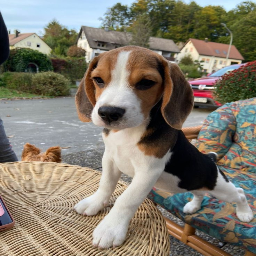

1/1 [==============================] - 0s 31ms/step
[[0.9999987]]
Dog


In [47]:
img_path = 'Ded.jpg'
img = cv2.imread(img_path)
img = cv2.resize(img,(256,256))
cv2_imshow(img)
img = img/255
img = np.reshape(img,[1,256,256,3])
pred = model.predict(img)
print(pred)
if pred[0]>0.5:
  print('Dog')
else:
  print('Cat')

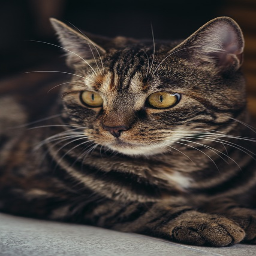

1/1 [==============================] - 0s 23ms/step
[[4.311707e-08]]
Cat


In [49]:
img_path = 'Catety.jpg'
img = cv2.imread(img_path)
img = cv2.resize(img,(256,256))
cv2_imshow(img)
img = img/255
img = np.reshape(img,[1,256,256,3])
pred = model.predict(img)
print(pred)
if pred[0]>0.5:
  print('Dog')
else:
  print('Cat')

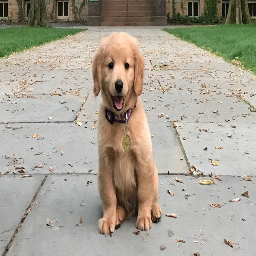

1/1 [==============================] - 0s 40ms/step
[[0.99999535]]
Dog


In [50]:
img_path = 'adub.jpg'
img = cv2.imread(img_path)
img = cv2.resize(img,(256,256))
cv2_imshow(img)
img = img/255
img = np.reshape(img,[1,256,256,3])
pred = model.predict(img)
print(pred)
if pred[0]>0.5:
  print('Dog')
else:
  print('Cat')

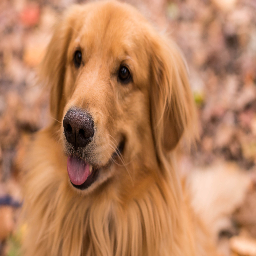

1/1 [==============================] - 0s 33ms/step
[[0.747818]]
Dog


In [51]:
img_path = 'dogbreed.jpg'
img = cv2.imread(img_path)
img = cv2.resize(img,(256,256))
cv2_imshow(img)
img = img/255
img = np.reshape(img,[1,256,256,3])
pred = model.predict(img)
print(pred)
if pred[0]>0.5:
  print('Dog')
else:
  print('Cat')